# Segment customers of an e-commerce site

In [256]:
#import modules
import pandas as pd # for dataframes
import numpy as np
import matplotlib.pyplot as plt # for plotting graphs
from matplotlib import style
import seaborn as sns # for plotting graphs
sns.set(style="ticks")
import datetime as dt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.datasets import make_blobs

In [257]:
pd.set_option('display.max_row', 100)
pd.set_option('display.max_column', 99)

In [258]:
df = pd.read_csv(r"C:\Users\SAMSUNG\Desktop\OpenClassrooms\P5_OC\P5_Donnees\olist_dataset.csv", sep=",")
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_description_lenght,product_photos_qty,payment_sequential,payment_type,payment_installments,payment_value,delivery_against_estimated,order_purchase_year,order_purchase_month,order_purchase_dayofweek,order_purchase_hour,order_purchase_day,order_purchase_mon,month_year,month_y,minpurchasedate,usertype
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,268.0,4.0,1.0,credit_card,1.0,18.12,7.0,2017,10,0,10,Mon,Oct,2017-10,201710,201709,Existing
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,268.0,4.0,3.0,voucher,1.0,2.00,7.0,2017,10,0,10,Mon,Oct,2017-10,201710,201709,Existing
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,268.0,4.0,2.0,voucher,1.0,18.59,7.0,2017,10,0,10,Mon,Oct,2017-10,201710,201709,Existing
3,69923a4e07ce446644394df37a710286,31f31efcb333fcbad2b1371c8cf0fa84,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-04 21:22:15,2017-09-05 19:20:20,2017-09-15 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,9abb00920aae319ef9eba674b7d2e6ff,1771297ac436903d1dd6b0e9279aa505,2017-09-11 11:43:25,35.39,8.72,bebes,2395.0,1.0,1.0,credit_card,1.0,44.11,9.0,2017,9,0,11,Mon,Sep,2017-09,201709,201709,New
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria,178.0,1.0,1.0,boleto,1.0,141.46,5.0,2018,7,1,20,Tue,Jul,2018-07,201807,201807,New


In [259]:
df = df.set_index("customer_unique_id")
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_description_lenght,product_photos_qty,payment_sequential,payment_type,payment_installments,payment_value,delivery_against_estimated,order_purchase_year,order_purchase_month,order_purchase_dayofweek,order_purchase_hour,order_purchase_day,order_purchase_mon,month_year,month_y,minpurchasedate,usertype
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,268.0,4.0,1.0,credit_card,1.0,18.12,7.0,2017,10,0,10,Mon,Oct,2017-10,201710,201709,Existing
7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,268.0,4.0,3.0,voucher,1.0,2.00,7.0,2017,10,0,10,Mon,Oct,2017-10,201710,201709,Existing
7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,268.0,4.0,2.0,voucher,1.0,18.59,7.0,2017,10,0,10,Mon,Oct,2017-10,201710,201709,Existing
7c396fd4830fd04220f754e42b4e5bff,69923a4e07ce446644394df37a710286,31f31efcb333fcbad2b1371c8cf0fa84,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-04 21:22:15,2017-09-05 19:20:20,2017-09-15 00:00:00,3149,sao paulo,SP,1.0,9abb00920aae319ef9eba674b7d2e6ff,1771297ac436903d1dd6b0e9279aa505,2017-09-11 11:43:25,35.39,8.72,bebes,2395.0,1.0,1.0,credit_card,1.0,44.11,9.0,2017,9,0,11,Mon,Sep,2017-09,201709,201709,New
af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,47813,barreiras,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria,178.0,1.0,1.0,boleto,1.0,141.46,5.0,2018,7,1,20,Tue,Jul,2018-07,201807,201807,New


In [260]:
rfm = pd.read_csv(r"C:\Users\SAMSUNG\Desktop\OpenClassrooms\P5_OC\P5_Donnees\olist_rfm.csv", sep=",")
rfm = rfm.set_index("customer_unique_id")
rfm.head()

,monetary,frequency,recency,r_quartile,m_quartile,f_split,RFM_Score
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,160,1,141,2,4,1,214
0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27,4,3,1,413
0000f46a3911fa3c0805444483337064,586,1,86,3,1,1,311
0000f6ccb0745a6a4b88665a16c9f078,370,1,43,4,2,1,412
0004aac84e0df4da2b147fca70cf8255,337,1,196,1,2,1,112


In [261]:
df_num = rfm[['monetary', 'recency', 'frequency']]
df_num.head()

,monetary,recency,frequency
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,160,141,1
0000b849f77a49e4a4ce2b2a4ca5be3f,163,27,1
0000f46a3911fa3c0805444483337064,586,86,1
0000f6ccb0745a6a4b88665a16c9f078,370,43,1
0004aac84e0df4da2b147fca70cf8255,337,196,1


## Apprentissage non supervisé

## 1. Elbow Method

In [262]:
# transform data into numpy array 
X = df_num.values
X

array([[160, 141,   1],
       [163,  27,   1],
       [586,  86,   1],
       ...,
       [617, 112,   1],
       [168, 133,   1],
       [533,  71,   1]], dtype=int64)

Text(0, 0.5, 'Cout du modele (Inertia)')

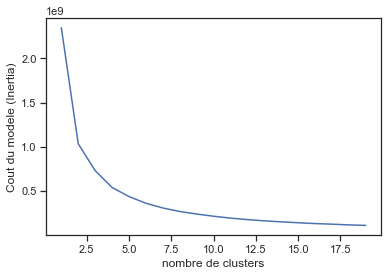

In [7]:
inertia = []
K_range = range(1, 20)

for k in K_range:
            model = KMeans(n_clusters=k).fit(X)
            inertia.append(model.inertia_)


plt.plot(K_range, inertia)
plt.xlabel('nombre de clusters')
plt.ylabel('Cout du modele (Inertia)')

## 2. Calculate Silhouette Score for K-Means Clusters With n_clusters = N

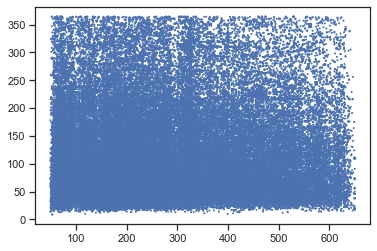

In [8]:
# plot scatter plot
plt.scatter(df_num['monetary'], df_num['recency'], df_num['frequency'])

In [8]:
# Instantiate the KMeans models

km = KMeans(n_clusters=3, random_state=42)

# Fit the KMeans model

km.fit_predict(X)

# Calculate Silhoutte Score

score = silhouette_score(X, km.labels_, metric='euclidean')

# Print the score

print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.385


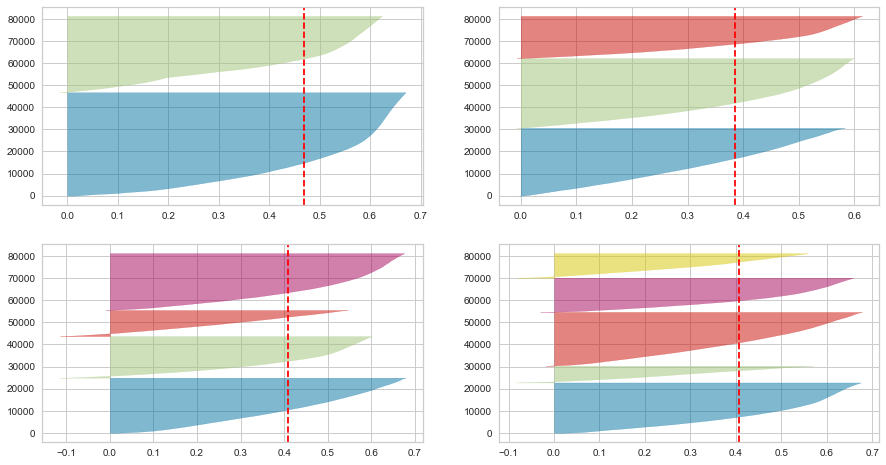

In [210]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
                km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
                q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
                visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
                visualizer.fit(X)

## 3. K-Means Clustering

In [263]:
#classe pour standardisation
from sklearn.preprocessing import StandardScaler

#instanciation
sc = StandardScaler()

#transformation – centrage-réduction
Z = sc.fit_transform(X)
print(Z)

[[-0.82698468  0.27649694 -0.25617218]
 [-0.80710264 -1.18474075 -0.25617218]
 [ 1.99626514 -0.42848616 -0.25617218]
 ...
 [ 2.2017129  -0.09522142 -0.25617218]
 [-0.7739659   0.17395394 -0.25617218]
 [ 1.64501575 -0.62075428 -0.25617218]]


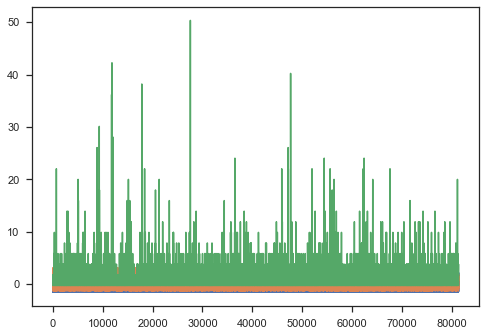

In [219]:
plt.plot(Z)
plt.show()

In [220]:
np.min(Z[0]), np.max(Z[0]) 

(-0.8269846772800221, 0.2764969362941775)

In [221]:
np.min(Z[1]), np.max(Z[1]) 

(-1.1847407533119876, -0.2561721836586645)

In [222]:
np.min(Z[2]), np.max(Z[2])

(-0.42848615956844605, 1.9962651442932557)

Text(0.5, 1.0, 'K-Means Clustering')

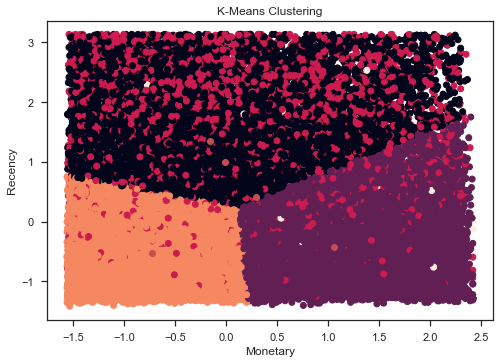

In [266]:
# Model
model = KMeans(n_clusters=5)
model.fit(Z)
model.predict(Z)
plt.scatter(Z[:,0], Z[:,1], c=model.predict(Z))
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='r')
model.score(Z)

plt.xlabel('Monetary')
plt.ylabel('Recency')
plt.title('K-Means Clustering')

Text(0.5, 1.0, 'K-Means Clustering')

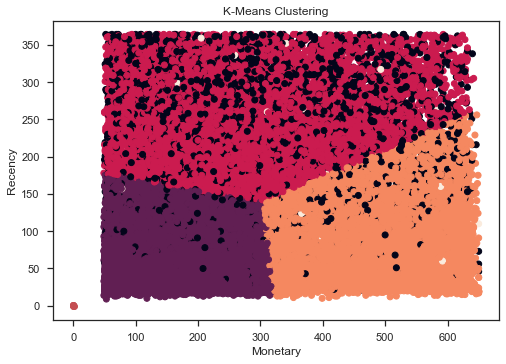

In [267]:
# Model original axis 
# Recency # Monetary
model = KMeans(n_clusters=5)
model.fit(Z)
model.predict(Z)
plt.scatter(X[:,0], X[:,1], c=model.predict(Z))
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='r')
model.score(X)

plt.xlabel('Monetary')
plt.ylabel('Recency')
plt.title('K-Means Clustering')

Text(0.5, 1.0, 'K-Means Clustering')

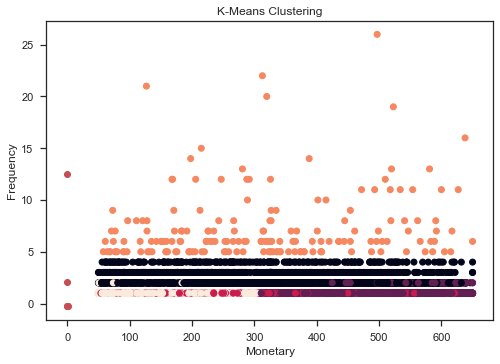

In [268]:
# Model original axis 
# Frequency # Monetary
model = KMeans(n_clusters=5)
model.fit(Z)
model.predict(Z)
plt.scatter(X[:,0], X[:,2], c=model.predict(Z))
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,2], c='r')
model.score(X)

plt.xlabel('Monetary')
plt.ylabel('Frequency')
plt.title('K-Means Clustering')

In [269]:
# Nb clients per cluster
val, count = np.unique(model.labels_, return_counts= True)
print(val)
print(count)

[0 1 2 3 4]
[ 7453 25370 14854   177 33466]


In [270]:
df_num['clusters'] = model.predict(Z)

<ipython-input-270-50877b3ca77a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['clusters'] = model.predict(Z)


### Cluster 0

In [271]:
df_num[df_num['clusters'].isin(['0'])]

,monetary,recency,frequency,clusters
customer_unique_id,,,,
000e309254ab1fc5ba99dd469d36bdb4,114,78,2,0
0015752e079902b12cd00b9b7596276b,76,149,2,0
001926cef41060fae572e2e7b30bd2a4,426,182,2,0
001928b561575b2821c92254a2327d06,54,329,2,0
0028a7d8db7b0247652509358ad8d755,308,354,2,0
...,...,...,...,...
ffd6f65402f2bc47238ecd2bdc93e0d4,161,166,2,0
ffdf771c03dd683f1ed7017ae4e9efb2,81,100,2,0
ffe96201d466b0e0dc8139850be29d5d,93,192,2,0


In [272]:
df_num[df_num['clusters'].isin(['0'])].describe()

,monetary,recency,frequency,clusters
count,7453.000000,7453.000000,7453.000000,7453.0
mean,282.819133,197.653294,2.154837,0.0
std,143.558356,85.960165,0.445247,0.0
min,50.000000,17.000000,2.000000,0.0
25%,166.000000,129.000000,2.000000,0.0
50%,267.000000,193.000000,2.000000,0.0
75%,384.000000,267.000000,2.000000,0.0
max,650.000000,364.000000,4.000000,0.0


### Cluster 0 analysis

In [273]:
cluster0 = df_num[df_num['clusters'].isin(['0'])]
cluster0.index

Index(['000e309254ab1fc5ba99dd469d36bdb4', '0015752e079902b12cd00b9b7596276b',
       '001926cef41060fae572e2e7b30bd2a4', '001928b561575b2821c92254a2327d06',
       '0028a7d8db7b0247652509358ad8d755', '00324c9f4d710e7bac5c5ba679714430',
       '003e2af81ea3c72fbdd093f07724a4de', '004288347e5e88a27ded2bb23747066c',
       '0049db44bfd6cee26ac9c649329ff6ea', '0058f300f57d7b93c477a131a59b36c3',
       ...
       'ff9584b796ae561b0085ebc998880a64', 'ff9c04f464ea62ad7787a0218336b942',
       'ffa4816b72b79e712d015c0a3640716d', 'ffad6a7a0e13be3dfd9de96a81b77c9e',
       'ffb52634b4c16223ff808f266332de04', 'ffd6f65402f2bc47238ecd2bdc93e0d4',
       'ffdf771c03dd683f1ed7017ae4e9efb2', 'ffe96201d466b0e0dc8139850be29d5d',
       'ffeddf8aa7cdecf403e77b2e9a99e2ea', 'fff22793223fe80c97a8fd02ac5c6295'],
      dtype='object', name='customer_unique_id', length=7453)

In [274]:
customers_0 = cluster0.index
df0 = df[df.index.isin(customers_0)]
df0.shape

(16060, 35)

### Cluster 0 - product_category_name

In [356]:
res0 = df0.groupby('product_category_name').agg({'payment_value': lambda payment_value: payment_value.sum()})
res0.sort_values(['payment_value'], ascending = False).head(20)

,payment_value
product_category_name,
cama_mesa_banho,192432.84
moveis_decoracao,179099.78
esporte_lazer,127893.01
beleza_saude,106251.68
utilidades_domesticas,101127.75
ferramentas_jardim,97180.14
informatica_acessorios,87070.32
relogios_presentes,60404.49
brinquedos,45824.13


### Cluster 0 - customer_state

In [347]:
ress0 = df0.groupby('customer_state').agg({'payment_value': lambda payment_value: payment_value.sum()})
ress0.sort_values(['payment_value'], ascending = False).head(20)

,payment_value
customer_state,
SP,638676.96
RJ,197121.94
MG,182079.01
RS,85343.10
PR,73711.57
SC,53684.89
BA,47308.64
GO,33110.40
DF,29291.51


### Cluster 0 - payment_type

In [277]:
resss0 = df0.groupby('payment_type').agg({'payment_value': lambda payment_value: payment_value.sum()})
resss0.sort_values(['payment_value'], ascending = False)

,payment_value
payment_type,
credit_card,1053700.74
boleto,253933.09
voucher,151451.99
debit_card,17477.90


### Cluster 1

In [278]:
df_num[df_num['clusters'].isin(['1'])]

,monetary,recency,frequency,clusters
customer_unique_id,,,,
0000f46a3911fa3c0805444483337064,586,86,1,1
0000f6ccb0745a6a4b88665a16c9f078,370,43,1,1
0005e1862207bf6ccc02e4228effd9a0,592,150,1,1
0006fdc98a402fceb4eb0ee528f6a8d4,456,29,1,1
00082cbe03e478190aadbea78542e933,332,126,1,1
...,...,...,...,...
fff699c184bcc967d62fa2c6171765f7,411,55,1,1
fffa431dd3fcdefea4b1777d114144f2,352,81,1,1
fffea47cd6d3cc0a88bd621562a9d061,311,84,1,1


In [279]:
df_num[df_num['clusters'].isin(['1'])].describe()

,monetary,recency,frequency,clusters
count,25370.000000,25370.000000,25370.000000,25370.0
mean,443.722428,85.715412,1.014072,1.0
std,92.999134,43.147896,0.117789,0.0
min,305.000000,10.000000,1.000000,1.0
25%,360.000000,51.000000,1.000000,1.0
50%,436.000000,77.000000,1.000000,1.0
75%,518.000000,115.000000,1.000000,1.0
max,650.000000,247.000000,2.000000,1.0


### Cluster 1 analysis

In [280]:
cluster1 = df_num[df_num['clusters'].isin(['1'])]
cluster1.index

Index(['0000f46a3911fa3c0805444483337064', '0000f6ccb0745a6a4b88665a16c9f078',
       '0005e1862207bf6ccc02e4228effd9a0', '0006fdc98a402fceb4eb0ee528f6a8d4',
       '00082cbe03e478190aadbea78542e933', '000a5ad9c4601d2bbdd9ed765d5213b3',
       '000bfa1d2f1a41876493be685390d6d3', '00115fc7123b5310cf6d3a3aa932699e',
       '0011857aff0e5871ce5eb429f21cdaf5', '0011c98589159d6149979563c504cb21',
       ...
       'ffedff0547d809c90c05c2691c51f9b7', 'ffeefd086fc667aaf6595c8fe3d22d54',
       'ffef0ffa736c7b3d9af741611089729b', 'fff1afc79f6b5db1e235a4a6c30ceda7',
       'fff3a9369e4b7102fab406a334a678c3', 'fff699c184bcc967d62fa2c6171765f7',
       'fffa431dd3fcdefea4b1777d114144f2', 'fffea47cd6d3cc0a88bd621562a9d061',
       'ffff371b4d645b6ecea244b27531430a', 'ffffd2657e2aad2907e67c3e9daecbeb'],
      dtype='object', name='customer_unique_id', length=25370)

In [281]:
customers_1 = cluster1.index
df1 = df[df.index.isin(customers_1)]
df1.shape

(25727, 35)

### Cluster 1 - product_category_name

In [355]:
res1 = df1.groupby('product_category_name').agg({'payment_value': lambda payment_value: payment_value.sum()})
res1.sort_values(['payment_value'], ascending = False).head(20)

,payment_value
product_category_name,
cama_mesa_banho,236411.69
esporte_lazer,198909.11
beleza_saude,171597.68
brinquedos,145019.50
moveis_decoracao,143801.85
cool_stuff,126323.76
utilidades_domesticas,125565.86
informatica_acessorios,115348.39
ferramentas_jardim,102997.06


### Cluster 1 - customer_state

In [348]:
ress1 = df0.groupby('customer_state').agg({'payment_value': lambda payment_value: payment_value.sum()})
ress1.sort_values(['payment_value'], ascending = False).head(20)

,payment_value
customer_state,
SP,638676.96
RJ,197121.94
MG,182079.01
RS,85343.10
PR,73711.57
SC,53684.89
BA,47308.64
GO,33110.40
DF,29291.51


### Cluster 1 - payment_type

In [284]:
resss1 = df1.groupby('payment_type').agg({'payment_value': lambda payment_value: payment_value.sum()})
resss1.sort_values(['payment_value'], ascending = False)

,payment_value
payment_type,
credit_card,1653587.81
boleto,474582.92
voucher,36458.82
debit_card,21868.35


### Cluster 2

In [285]:
df_num[df_num['clusters'].isin(['2'])]

,monetary,recency,frequency,clusters
customer_unique_id,,,,
0004aac84e0df4da2b147fca70cf8255,337,196,1,2
0004bd2a26a76fe21f786e4fbd80607f,195,166,1,2
0010a452c6d13139e50b57f19f52e04e,463,325,1,2
0011805441c0d1b68b48002f1d005526,541,297,1,2
0019e8c501c85848ac0966d45226fa1d,169,197,1,2
...,...,...,...,...
ffe96c782a5bc522bd8bad3bc638981a,79,245,1,2
ffe9be10b9a58c5464d833e8b1b2c632,324,155,1,2
ffe9e41fbd14db4a7361347c56af5447,248,220,1,2


In [286]:
df_num[df_num['clusters'].isin(['2'])].describe()

,monetary,recency,frequency,clusters
count,14854.000000,14854.000000,14854.0,14854.0
mean,263.729164,226.333849,1.0,2.0
std,125.639013,55.859608,0.0,0.0
min,50.000000,140.000000,1.0,2.0
25%,169.000000,182.000000,1.0,2.0
50%,255.000000,213.000000,1.0,2.0
75%,336.000000,262.000000,1.0,2.0
max,647.000000,364.000000,1.0,2.0


### Cluster 2 analysis

In [287]:
cluster2 = df_num[df_num['clusters'].isin(['2'])]
cluster2.index

Index(['0004aac84e0df4da2b147fca70cf8255', '0004bd2a26a76fe21f786e4fbd80607f',
       '0010a452c6d13139e50b57f19f52e04e', '0011805441c0d1b68b48002f1d005526',
       '0019e8c501c85848ac0966d45226fa1d', '002043098f10ba39a4600b6c52fbfe3c',
       '002aba8c1af80acacef6e011f9f23262', '002cdf87d4c03f08f7eb4551a923affc',
       '00344274804f3b8003de1b0562ae01df', '00370dfde3d012c420d29657afc2fc8b',
       ...
       'ffcb3eb07f2a033d45949fcecd160d98', 'ffddf4e5baa1623f69d3c5e0d775e1af',
       'ffe0c10afc687bcf34a0451f2b87dd9b', 'ffe39c116d96cd81dcdfd9dcca655cd1',
       'ffe6efca3c7e6a06bad0a6a883280a93', 'ffe96c782a5bc522bd8bad3bc638981a',
       'ffe9be10b9a58c5464d833e8b1b2c632', 'ffe9e41fbd14db4a7361347c56af5447',
       'fff1bdd5c5e37ca79dd74deeb91aa5b6', 'fff2ae16b99c6f3c785f0e052f2a9cfb'],
      dtype='object', name='customer_unique_id', length=14854)

In [288]:
customers_2 = cluster2.index
df2 = df[df.index.isin(customers_2)]
df2.shape

(14854, 35)

### Cluster 2 - product_category_name

In [354]:
res2 = df2.groupby('product_category_name').agg({'payment_value': lambda payment_value: payment_value.sum()})
res2.sort_values(['payment_value'],ascending=False).head(20)

,payment_value
product_category_name,
relogios_presentes,360497.62
beleza_saude,283095.31
esporte_lazer,262895.40
cama_mesa_banho,257080.75
informatica_acessorios,249155.06
cool_stuff,238568.49
moveis_decoracao,199395.46
utilidades_domesticas,150146.36
automotivo,149199.88


### Cluster 2 - customer_state

In [349]:
ress2 = df2.groupby('customer_state').agg({'payment_value': lambda payment_value: payment_value.sum()})
ress2.sort_values(['payment_value'], ascending = False).head(20)

,payment_value
customer_state,
SP,1216434.39
RJ,457375.29
MG,401556.64
RS,194148.18
PR,161947.57
BA,141992.94
SC,129270.23
PE,78293.01
ES,74731.69


### Cluster 2 - payment_type

In [291]:
resss2 = df2.groupby('payment_type').agg({'payment_value': lambda payment_value: payment_value.sum()})
resss2.sort_values(['payment_value'], ascending = False)

,payment_value
payment_type,
credit_card,2747671.22
boleto,557932.44
debit_card,44603.12
voucher,19083.17


### Cluster 3

In [292]:
df_num[df_num['clusters'].isin(['3'])]

,monetary,recency,frequency,clusters
customer_unique_id,,,,
00face5c8f7dbb7eefd4112722f26903,223,28,6,3
024676cef113f6c81db6c5b8d29e5ee9,169,63,12,3
075c65074dbbe8cc9fc87132c5e452b0,158,200,5,3
08d8fd00898e7cc99d6e32c74d7d3ce5,243,35,8,3
096e351116755fe4c3c1e48eaf301a41,519,217,8,3
...,...,...,...,...
f6ce56125dd12927a023b879008a5ced,205,359,5,3
f71d1ce0ca77b13eb4a0909685c1a288,268,33,7,3
fa897856f19a95faf61b1fe22bfd0ace,592,60,7,3


In [293]:
df_num[df_num['clusters'].isin(['3'])].describe()

,monetary,recency,frequency,clusters
count,177.000000,177.000000,177.000000,177.0
mean,312.186441,151.209040,7.333333,3.0
std,157.810640,94.740953,3.440512,0.0
min,58.000000,19.000000,5.000000,3.0
25%,182.000000,74.000000,5.000000,3.0
50%,312.000000,121.000000,6.000000,3.0
75%,420.000000,217.000000,8.000000,3.0
max,650.000000,359.000000,26.000000,3.0


### Cluster 3 analysis

In [294]:
cluster3 = df_num[df_num['clusters'].isin(['3'])]
cluster3.index

Index(['00face5c8f7dbb7eefd4112722f26903', '024676cef113f6c81db6c5b8d29e5ee9',
       '075c65074dbbe8cc9fc87132c5e452b0', '08d8fd00898e7cc99d6e32c74d7d3ce5',
       '096e351116755fe4c3c1e48eaf301a41', '09f55ef15bde8baeef87b3348b31c150',
       '0aa1ab39ff2b837c05d7c9ff85b6d983', '0f706c0bd2502557acaa2f94d01a0d23',
       '0fc594155e889688ea4477afcd26a134', '0fff4016f4008007ba2bb7d63ebae39d',
       ...
       'ec59dafb5820ce13fcc2fd6402be9b54', 'eeae1c6f0813ad6f82afa34bd0064032',
       'f0fd988c7c2a4cba167138a8adada6ca', 'f33b0a87c25c58d1b8ad7f30eb0645ae',
       'f69dd277696f9a8fbe3745934891c18a', 'f6ce56125dd12927a023b879008a5ced',
       'f71d1ce0ca77b13eb4a0909685c1a288', 'fa897856f19a95faf61b1fe22bfd0ace',
       'fe3e52de024b82706717c38c8e183084', 'ff4bb0e2cade5df30146a1d570ae777d'],
      dtype='object', name='customer_unique_id', length=177)

In [295]:
customers_3 = cluster3.index
df3 = df[df.index.isin(customers_3)]
df3.shape

(1298, 35)

### Cluster 3 - product_category_name

In [353]:
res3 = df3.groupby('product_category_name').agg({'payment_value': lambda payment_value: payment_value.sum()})
res3.sort_values(['payment_value'], ascending = False).head(20)

,payment_value
product_category_name,
cama_mesa_banho,5915.87
moveis_decoracao,3824.38
utilidades_domesticas,2435.58
beleza_saude,1790.54
esporte_lazer,1496.70
telefonia,1264.55
cool_stuff,1091.89
brinquedos,1046.06
ferramentas_jardim,923.33


### Cluster 3 - customer_state

In [351]:
ress3 = df3.groupby('customer_state').agg({'payment_value': lambda payment_value: payment_value.sum()})
ress3.sort_values(['payment_value'], ascending = False)

,payment_value
customer_state,
SP,13014.14
RJ,4532.89
MG,2288.44
PR,1558.83
BA,1203.63
RS,885.99
SC,760.63
GO,735.77
ES,637.41


### Cluster 3 - payment_type

In [298]:
resss3 = df3.groupby('payment_type').agg({'payment_value': lambda payment_value: payment_value.sum()})
resss3.sort_values(['payment_value'], ascending = False)

,payment_value
payment_type,
voucher,20690.71
credit_card,5522.95
boleto,637.72


### Cluster 4

In [299]:
df_num[df_num['clusters'].isin(['4'])]

,monetary,recency,frequency,clusters
customer_unique_id,,,,
0000366f3b9a7992bf8c76cfdf3221e2,160,141,1,4
0000b849f77a49e4a4ce2b2a4ca5be3f,163,27,1,4
00050ab1314c0e55a6ca13cf7181fecf,180,35,1,4
0005ef4cd20d2893f0d9fbd94d3c0d97,219,129,1,4
00090324bbad0e9342388303bb71ba0a,207,63,1,4
...,...,...,...,...
ffee94d548cef05b146d825a7648dab4,82,35,1,4
fff3e1d7bc75f11dc7670619b2e61840,89,82,1,4
fff96bc586f78b1f070da28c4977e810,63,63,1,4


In [300]:
df_num[df_num['clusters'].isin(['4'])].describe()

,monetary,recency,frequency,clusters
count,33466.000000,33466.000000,33466.000000,33466.0
mean,173.932618,79.947200,1.006305,4.0
std,73.499644,37.946156,0.079154,0.0
min,49.000000,9.000000,1.000000,4.0
25%,110.000000,48.000000,1.000000,4.0
50%,173.000000,73.000000,1.000000,4.0
75%,237.000000,108.000000,1.000000,4.0
max,313.000000,180.000000,2.000000,4.0


### Cluster 4 analysis

In [301]:
cluster4 = df_num[df_num['clusters'].isin(['4'])]
cluster4.index

Index(['0000366f3b9a7992bf8c76cfdf3221e2', '0000b849f77a49e4a4ce2b2a4ca5be3f',
       '00050ab1314c0e55a6ca13cf7181fecf', '0005ef4cd20d2893f0d9fbd94d3c0d97',
       '00090324bbad0e9342388303bb71ba0a', '000949456b182f53c18b68d6babc79c1',
       '000c8bdb58a29e7115cfc257230fb21b', '000d460961d6dbfa3ec6c9f5805769e1',
       '000ec5bff359e1c0ad76a81a45cb598f', '000ed48ceeb6f4bf8ad021a10a3c7b43',
       ...
       'ffe76cb2f4bb39384c432d65ece67441', 'ffeb904468642a1ce663a322629801cb',
       'ffec10ad4229ba46818560e1c8b40a68', 'ffec490ab531184a483efe2eedd68908',
       'ffecceca389973ef16660d58696f281e', 'ffee94d548cef05b146d825a7648dab4',
       'fff3e1d7bc75f11dc7670619b2e61840', 'fff96bc586f78b1f070da28c4977e810',
       'fffb09418989a0dbff854a28163e47c6', 'ffff5962728ec6157033ef9805bacc48'],
      dtype='object', name='customer_unique_id', length=33466)

In [142]:
customers_4 = cluster4.index
df4= df[df.index.isin(customers_4)]
df4.shape

(1008, 35)

### Cluster 4 - product_category_name

In [352]:
res4 = df4.groupby('product_category_name').agg({'payment_value': lambda payment_value: payment_value.sum()})
res4.sort_values(['payment_value'], ascending = False).head(20)

,payment_value
product_category_name,
cama_mesa_banho,4149.08
moveis_decoracao,2123.56
esporte_lazer,1357.20
beleza_saude,1185.20
utilidades_domesticas,1103.29
cool_stuff,812.66
bebes,802.70
telefonia,755.16
informatica_acessorios,677.73


### Cluster 4 - customer_state

In [303]:
ress4 = df4.groupby('customer_state').agg({'payment_value': lambda payment_value: payment_value.sum()})
ress4.sort_values(['payment_value'], ascending = False)

,payment_value
customer_state,
SP,8843.02
RJ,3164.93
MG,1652.29
BA,947.26
PR,921.21
RS,819.53
SC,481.40
ES,335.90
GO,315.68


### Cluster 4 - payment_type

In [304]:
resss4 = df4.groupby('payment_type').agg({'payment_value': lambda payment_value: payment_value.sum()})
resss4.sort_values(['payment_value'], ascending = False)

,payment_value
payment_type,
voucher,15433.04
credit_card,2443.57
boleto,299.22


## 4. PCA : Reduction de dimension

### Visualisation 2D

In [305]:
df_acp = df_num
df_acp.head()

,monetary,recency,frequency,clusters
customer_unique_id,,,,
0000366f3b9a7992bf8c76cfdf3221e2,160,141,1,4
0000b849f77a49e4a4ce2b2a4ca5be3f,163,27,1,4
0000f46a3911fa3c0805444483337064,586,86,1,1
0000f6ccb0745a6a4b88665a16c9f078,370,43,1,1
0004aac84e0df4da2b147fca70cf8255,337,196,1,2


In [306]:
# verification 
# mean
print(np.mean(Z,axis = 0))

[-1.28049727e-16  7.42697154e-18  1.31413708e-16]


In [307]:
# standard deviation
print(np.std(Z,axis = 0,ddof = 0))

[1. 1. 1.]


In [308]:
# ACP class
from sklearn.decomposition import PCA

#instanciation
acp = PCA(svd_solver ='full')

In [309]:
# param print
print(acp)

PCA(svd_solver='full')


In [310]:
# compute principal components
from sklearn import decomposition

pca = decomposition.PCA(n_components = 2)
pca.fit(Z)

PCA(n_components=2)

In [311]:
# percentage of variance explained
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.40411803 0.33379468]
0.7379127076663194


### monetary

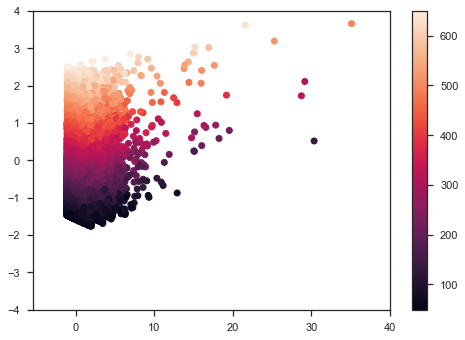

In [312]:
# project X onto the principal components
X_projected = pca.transform(Z)

# display each observation
plt.scatter(X_projected[:, 0], X_projected[:, 1],
    # color using variable 'monetary'
    c = df_acp.get('monetary'))

plt.xlim([-5.5, 40])
plt.ylim([-4, 4])
plt.colorbar()

### recency

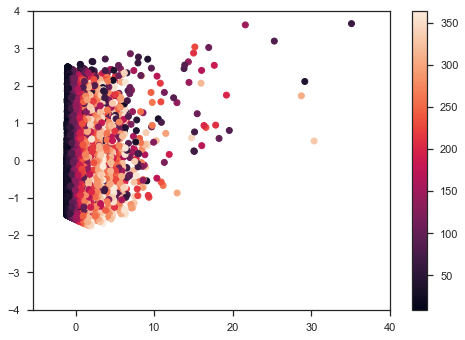

In [313]:
# project X onto the principal components
X_projected = pca.transform(Z)

# display each observation
plt.scatter(X_projected[:, 0], X_projected[:, 1],
    # color using variable 'payment_value'
    c = df_acp.get('recency'))

plt.xlim([-5.5, 40])
plt.ylim([-4, 4])
plt.colorbar()

### frequency

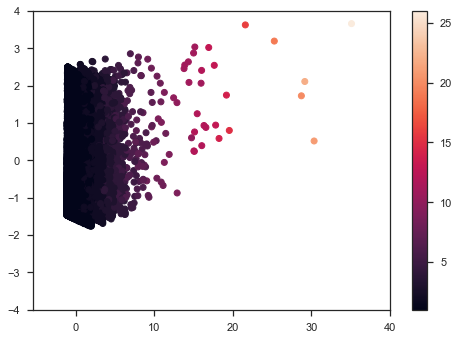

In [314]:
# project X onto the principal components
X_projected = pca.transform(Z)

# display each observation
plt.scatter(X_projected[:, 0], X_projected[:, 1],
    # color using variable 'payment_value'
    c = df_acp.get('frequency'))

plt.xlim([-5.5, 40])
plt.ylim([-4, 4])
plt.colorbar()

(-0.7, 1.0)

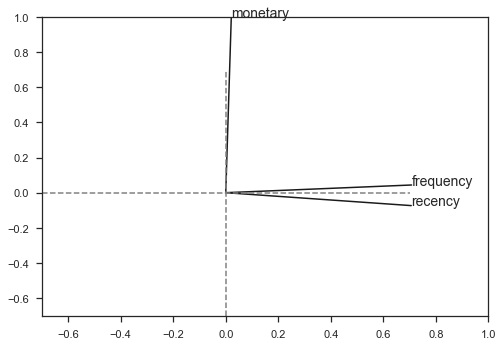

In [315]:
# Contribution of each variable to the principal components
pcs = pca.components_

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # Display a segment from origin to point (x, y)
    plt.plot([0, x], [0, y], color = 'k')
    # Display the name (df_num.columns [i]) of the performance
    plt.text(x, y, df_acp.columns[i], fontsize = '14')

# Show horizontal line y = 0
plt.plot([-0.7, 0.7], [0, 0], color ='grey', ls = '--')

# Show vertical line x = 0
plt.plot([0, 0], [-0.7, 0.7], color ='grey', ls = '--')

plt.xlim([-0.7, 1])
plt.ylim([-0.7, 1])

### clusters

In [316]:
df_acp['clusters'] = model.predict(X)

<ipython-input-316-899ea0a5de33>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acp['clusters'] = model.predict(X)


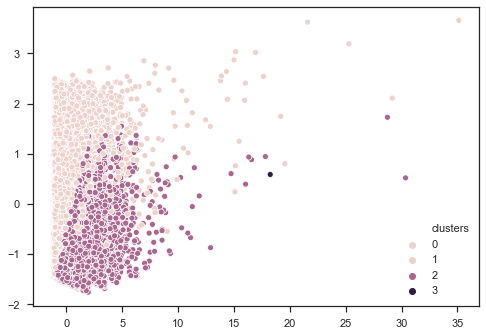

In [317]:
sns.scatterplot(data = df_acp, x = X_projected[:, 0], y = X_projected[:, 1], hue = "clusters")

In [318]:
df_num[df_num['clusters'].isin(['0'])]

,monetary,recency,frequency,clusters
customer_unique_id,,,,


In [319]:
df_num[df_num['clusters'].isin(['1'])]

,monetary,recency,frequency,clusters
customer_unique_id,,,,
0000b849f77a49e4a4ce2b2a4ca5be3f,163,27,1,1
0000f46a3911fa3c0805444483337064,586,86,1,1
0000f6ccb0745a6a4b88665a16c9f078,370,43,1,1
0004aac84e0df4da2b147fca70cf8255,337,196,1,1
00050ab1314c0e55a6ca13cf7181fecf,180,35,1,1
...,...,...,...,...
fffa431dd3fcdefea4b1777d114144f2,352,81,1,1
fffb09418989a0dbff854a28163e47c6,304,73,1,1
fffea47cd6d3cc0a88bd621562a9d061,311,84,1,1


In [320]:
df_num[df_num['clusters'].isin(['2'])]

,monetary,recency,frequency,clusters
customer_unique_id,,,,
0000366f3b9a7992bf8c76cfdf3221e2,160,141,1,2
0004bd2a26a76fe21f786e4fbd80607f,195,166,1,2
000e309254ab1fc5ba99dd469d36bdb4,114,78,2,2
0010a452c6d13139e50b57f19f52e04e,463,325,1,2
0015752e079902b12cd00b9b7596276b,76,149,2,2
...,...,...,...,...
fff22793223fe80c97a8fd02ac5c6295,113,267,3,2
fff2ae16b99c6f3c785f0e052f2a9cfb,180,200,1,2
fff3e1d7bc75f11dc7670619b2e61840,89,82,1,2


In [321]:
df_num[df_num['clusters'].isin(['3'])]

,monetary,recency,frequency,clusters
customer_unique_id,,,,
1bc3d5e384c365c86cf79078f32eb495,198,100,14,3


In [322]:
df_num[df_num['clusters'].isin(['4'])]

,monetary,recency,frequency,clusters
customer_unique_id,,,,


### payment_type

In [323]:
rfm

,monetary,frequency,recency,r_quartile,m_quartile,f_split,RFM_Score
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,160,1,141,2,4,1,214
0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27,4,3,1,413
0000f46a3911fa3c0805444483337064,586,1,86,3,1,1,311
0000f6ccb0745a6a4b88665a16c9f078,370,1,43,4,2,1,412
0004aac84e0df4da2b147fca70cf8255,337,1,196,1,2,1,112
...,...,...,...,...,...,...,...
fffb09418989a0dbff854a28163e47c6,304,1,73,3,2,1,312
fffea47cd6d3cc0a88bd621562a9d061,311,1,84,3,2,1,312
ffff371b4d645b6ecea244b27531430a,617,1,112,2,1,1,211


In [324]:
res = df.groupby("customer_unique_id")["payment_type"].value_counts()
res.name = "payment_type_count"
res = res.reset_index()

In [325]:
res[res.duplicated("customer_unique_id", keep = False)]

,customer_unique_id,payment_type,payment_type_count
19,000e309254ab1fc5ba99dd469d36bdb4,credit_card,1
20,000e309254ab1fc5ba99dd469d36bdb4,voucher,1
55,0028a7d8db7b0247652509358ad8d755,credit_card,1
56,0028a7d8db7b0247652509358ad8d755,voucher,1
73,00324c9f4d710e7bac5c5ba679714430,credit_card,1
...,...,...,...
94095,ff9bc66daa6702543b16f3c4897e300b,voucher,1
94097,ff9c04f464ea62ad7787a0218336b942,credit_card,1
94098,ff9c04f464ea62ad7787a0218336b942,voucher,1
94204,ffeddf8aa7cdecf403e77b2e9a99e2ea,credit_card,1


In [326]:
res = res.drop_duplicates("customer_unique_id")

In [327]:
res.head()

,customer_unique_id,payment_type,payment_type_count
0,0000366f3b9a7992bf8c76cfdf3221e2,credit_card,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,credit_card,1
2,0000f46a3911fa3c0805444483337064,credit_card,1
3,0000f6ccb0745a6a4b88665a16c9f078,credit_card,1
4,0004aac84e0df4da2b147fca70cf8255,credit_card,1


In [328]:
df_acp = df_acp.join(res.set_index("customer_unique_id"))

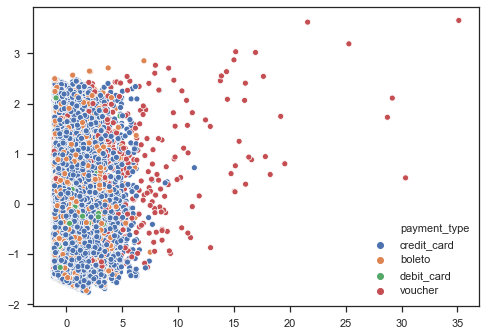

In [329]:
sns.scatterplot(data=df_acp, x=X_projected[:, 0], y=X_projected[:, 1], hue="payment_type")

### customer_state

In [330]:
ress = df.groupby("customer_unique_id")["customer_state"].value_counts()
ress.name = "customer_state_count"
ress = ress.reset_index()

In [331]:
ress[ress.duplicated("customer_unique_id", keep=False)]

,customer_unique_id,customer_state,customer_state_count
11413,1f90117a847636892e3c5bf569f2ac68,PR,1
11414,1f90117a847636892e3c5bf569f2ac68,SC,1
13013,2410195f6521688005612363835a2671,RS,1
13014,2410195f6521688005612363835a2671,SP,1
15903,2c45ab66a3dae52960147e76a35740ff,MS,1
15904,2c45ab66a3dae52960147e76a35740ff,RS,1
15952,2c6a91479a7dc00d8c9d650d8dee88ca,PR,1
15953,2c6a91479a7dc00d8c9d650d8dee88ca,SC,1
23201,408aee96c75632a92e5079eee61da399,RJ,1
23202,408aee96c75632a92e5079eee61da399,SP,1


In [332]:
ress = ress.drop_duplicates("customer_unique_id")

In [333]:
ress.head()

,customer_unique_id,customer_state,customer_state_count
0,0000366f3b9a7992bf8c76cfdf3221e2,SP,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,SP,1
2,0000f46a3911fa3c0805444483337064,SC,1
3,0000f6ccb0745a6a4b88665a16c9f078,PA,1
4,0004aac84e0df4da2b147fca70cf8255,SP,1


In [334]:
df_acp = df_acp.join(ress.set_index("customer_unique_id"))

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


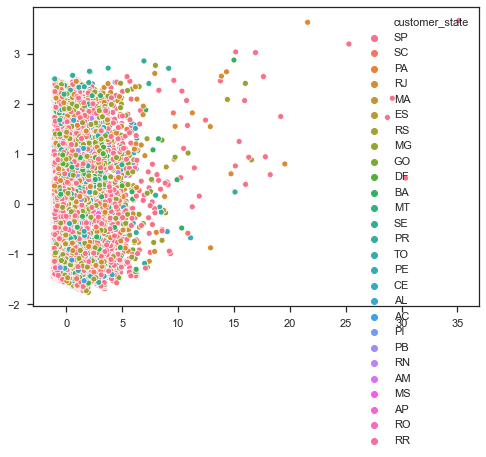

In [335]:
sns.scatterplot(data = df_acp, x = X_projected[:, 0], y = X_projected[:, 1], hue = "customer_state")

### product_category_name

In [336]:
resss = df.groupby("customer_unique_id")["product_category_name"].value_counts()
resss.name = "product_category_name_count"
resss = resss.reset_index()

In [337]:
resss[resss.duplicated("customer_unique_id", keep = False)]

,customer_unique_id,product_category_name,product_category_name_count
22,000fbf0473c10fc1ab6f8d2d286ce20c,brinquedos,2
23,000fbf0473c10fc1ab6f8d2d286ce20c,instrumentos_musicais,2
36,001926cef41060fae572e2e7b30bd2a4,eletronicos,1
37,001926cef41060fae572e2e7b30bd2a4,informatica_acessorios,1
38,001928b561575b2821c92254a2327d06,cama_mesa_banho,1
...,...,...,...
93953,ff8892f7c26aa0446da53d01b18df463,cama_mesa_banho,1
93954,ff8892f7c26aa0446da53d01b18df463,relogios_presentes,1
93971,ff922bdd6bafcdf99cb90d7f39cea5b3,cama_mesa_banho,1
93972,ff922bdd6bafcdf99cb90d7f39cea5b3,fashion_bolsas_e_acessorios,1


In [338]:
resss = resss.drop_duplicates("customer_unique_id")

In [339]:
resss.head()

,customer_unique_id,product_category_name,product_category_name_count
0,0000366f3b9a7992bf8c76cfdf3221e2,cama_mesa_banho,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,beleza_saude,1
2,0000f46a3911fa3c0805444483337064,papelaria,1
3,0000f6ccb0745a6a4b88665a16c9f078,telefonia,1
4,0004aac84e0df4da2b147fca70cf8255,telefonia,1


In [340]:
df_acp = df_acp.join(resss.set_index("customer_unique_id"))

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


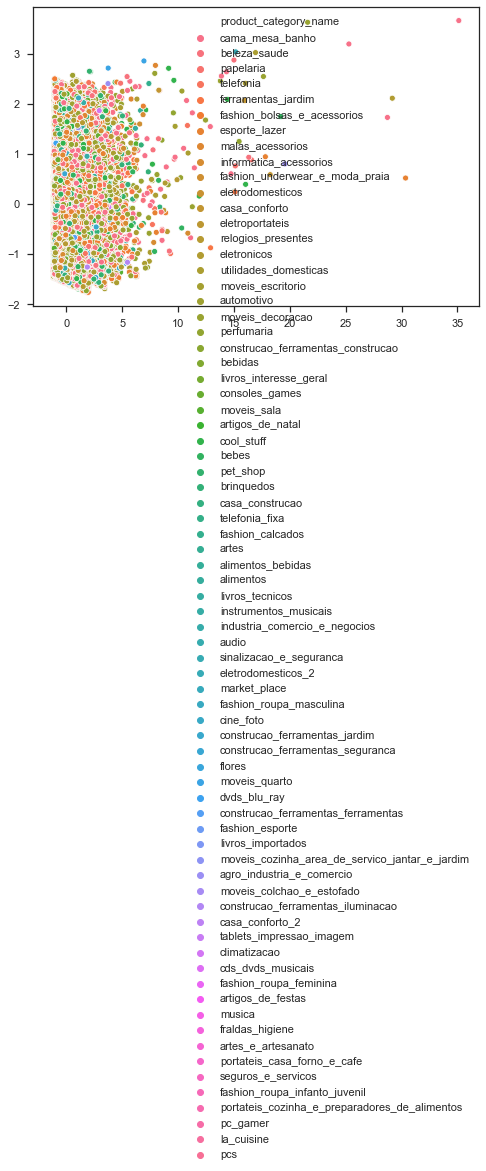

In [341]:
sns.scatterplot(data = df_acp, x = X_projected[:, 0], y = X_projected[:, 1], hue = "product_category_name")